In [172]:
import pandas as pd
from lohia_utilities.load_lee_matrix import parse_expression_hd5_lee
import seaborn as sns

In [165]:
import numpy as np
arr = np.array([[1, 2, 3], [1, 5, 6]])

In [168]:
arr

array([[1, 2, 3],
       [1, 5, 6]])

In [171]:
np.where(arr < 5, 0, 1)

array([[0, 0, 0],
       [0, 1, 1]])

In [169]:
from sklearn.metrics.pairwise import pairwise_distances
jac_sim = 1 - pairwise_distances(arr.T, metric = "hamming")

In [170]:
jac_sim

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [154]:
df_agg_ck_3 = pd.read_csv("/data/lohia/gene_distance_expresseion/ortho_co_exp_files/all_52_species_v6_common_2.txt" , sep="\t", header=None, names= ['resol','chr', 'auc', 'net_type', 'gene', 'species', 'auc_h', 'tss_tss', 'no_of_pairs'])


In [140]:
df_agg_ck_3 = df_agg_ck_3.groupby(['species'])['auc', 'auc_h'].mean().reset_index()

<ipython-input-140-c730af0800fa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_agg_ck_3 = df_agg_ck_3.groupby(['species'])['auc', 'auc_h'].mean().reset_index()


In [126]:
df_agg_ck_3['discrete'] = [1 if x>0.8 else 0 for x in df_agg_ck_4['auc']]

In [155]:
df_agg_ck_4 = df_agg_ck_3.merge(mya, left_on='species', right_on='saved_name')
df_agg_ck_4.sort_values(by=['mya'], inplace=True)

In [136]:
df_agg_ck_4

resol chr       auc     net_type             gene species     auc_h  \
0         10   X  0.655833  VC_rank_tss  ENSG00000000419   chimp  0.651667   
4891      10   X  0.820000  VC_rank_tss  ENSG00000160218   chimp  0.820000   
4890      10   X  0.990000  VC_rank_tss  ENSG00000160214   chimp  0.920000   
4889      10   X  0.680000  VC_rank_tss  ENSG00000160208   chimp  0.680000   
4888      10   X  0.540000  VC_rank_tss  ENSG00000160207   chimp  0.600000   
...      ...  ..       ...          ...              ...     ...       ...   
9764      10   X  0.613003  VC_rank_tss  ENSG00000117461     dog  0.663087   
9763      10   X  0.712164  VC_rank_tss  ENSG00000117419     dog  0.564430   
9762      10   X  0.566779  VC_rank_tss  ENSG00000117411     dog  0.596812   
9760      10   X  0.686493  VC_rank_tss  ENSG00000117408     dog  0.620302   
14655     10   X  0.985167  VC_rank_tss  ENSG00000278318     dog  0.973206   

       tss_tss  no_of_pairs species_x  ...  Tax_ID superkingdom  kingdom  \
0      2854760          NaN     chimp  ...    9598    Eukaryota  Metazoa   
4891   2854760          NaN     chimp  ...    9598    Eukaryota  Metazoa   
4890   2854760          NaN     chimp  ...    9598    Eukaryota  Metazoa   
4889   2854760          NaN     chimp  ...    9598    Eukaryota  Metazoa   
4888   2854760          NaN     chimp  ...    9598    Eukaryota  Metazoa   
...        ...          ...       ...  ...     ...          ...      ...   
9764   2854760          NaN       dog  ...    9615    Eukaryota  Metazoa   
9763   2854760          NaN       dog  ...    9615    Eukaryota  Metazoa   
9762   2854760          NaN       dog  ...    9615    Eukaryota  Metazoa   
9760   2854760          NaN       dog  ...    9615    Eukaryota  Metazoa   
14655  2854760          NaN       dog  ...    9615    Eukaryota  Metazoa   

         phylum     class      order     family  genus    species_y saved_name  
0      Chordata  Mammalia   Primates  Hominidae    Pan          NaN      chimp  
4891   Chordata  Mammalia   Primates  Hominidae    Pan          NaN      chimp  
4890   Chordata  Mammalia   Primates  Hominidae    Pan          NaN      chimp  
4889   Chordata  Mammalia   Primates  Hominidae    Pan          NaN      chimp  
4888   Chordata  Mammalia   Primates  Hominidae    Pan          NaN      chimp  
...         ...       ...        ...        ...    ...          ...        ...  
9764   Chordata  Mammalia  Carnivora    Canidae  Canis  Canis lupus        dog  
9763   Chordata  Mammalia  Carnivora    Canidae  Canis  Canis lupus        dog  
9762   Chordata  Mammalia  Carnivora    Canidae  Canis  Canis lupus        dog  
9760   Chordata  Mammalia  Carnivora    Canidae  Canis  Canis lupus        dog  
14655  Chordata  Mammalia  Carnivora    Canidae  Canis  Canis lupus        dog  

[14656 rows x 23 columns]

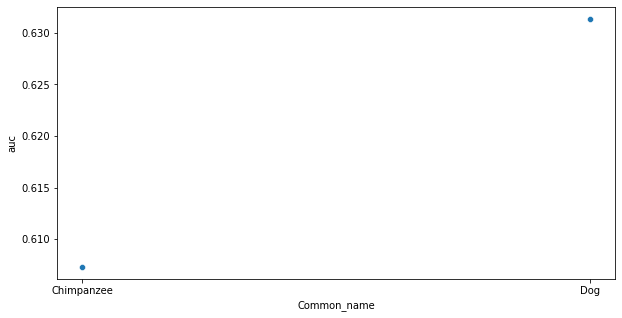

In [152]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(10,5))
chart = sns.scatterplot(data=df_agg_ck_4, x='Common_name', y='auc')

In [76]:
mya = pd.read_csv("/data/suresh/spe39_divergence_timetree.csv")
mya_ben = pd.read_csv("/data/bharris/species_classification_ranks_processed.txt")

In [77]:
mya_2 = mya.fillna(0).to_numpy()[:-1,1::] + mya.fillna(0).to_numpy()[:-1,1::].T
mya_l = mya_2[:,5].tolist()
species_name = mya.fillna(0).to_numpy()[:-1,0].tolist()

In [78]:
mya = pd.DataFrame(list(zip(species_name , mya_l)), columns=['species','mya'])

In [80]:
mya = mya.merge(mya_ben, left_on='species', right_on='saved_name')

In [93]:
df_agg_ck_4['species'].drop_duplicates()

6369       chimp
52130    rhesusm
15257      crabm
42150     rabbit
40878      mouse
45327        rat
59494      sheep
0           boar
30656      horse
13072        cow
21543        dog
29520       goat
Name: species, dtype: object

In [95]:
df_agg_ck_4.pivot('gene', "species", "discrete")[['chimp', 'rhesusm', 'crabm', 'rabbit', 'mouse', 'rat', 'sheep', 'boar', 'horse', 'cow', 'dog', 'goat']].T

gene     ENSG00000000005  ENSG00000000419  ENSG00000000457  ENSG00000000460  \
species                                                                       
chimp                NaN              0.0              0.0              0.0   
rhesusm              1.0              0.0              0.0              0.0   
crabm                NaN              0.0              1.0              0.0   
rabbit               NaN              0.0              0.0              0.0   
mouse                0.0              0.0              0.0              0.0   
rat                  NaN              0.0              0.0              0.0   
sheep                NaN              0.0              0.0              0.0   
boar                 NaN              0.0              0.0              0.0   
horse                NaN              0.0              0.0              0.0   
cow                  NaN              0.0              0.0              0.0   
dog                  NaN              0.0              0.0              0.0   
goat                 NaN              0.0              0.0              0.0   

gene     ENSG00000000938  ENSG00000001084  ENSG00000001167  ENSG00000001461  \
species                                                                       
chimp                NaN              0.0              0.0              0.0   
rhesusm              0.0              0.0              1.0              0.0   
crabm                0.0              0.0              1.0              0.0   
rabbit               0.0              0.0              0.0              0.0   
mouse                0.0              0.0              1.0              0.0   
rat                  0.0              0.0              0.0              0.0   
sheep                0.0              0.0              0.0              0.0   
boar                 0.0              0.0              1.0              0.0   
horse                0.0              0.0              1.0              0.0   
cow                  0.0              0.0              0.0              0.0   
dog                  0.0              0.0              1.0              0.0   
goat                 0.0              0.0              1.0              0.0   

gene     ENSG00000001497  ENSG00000001561  ...  ENSG00000272333  \
species                                    ...                    
chimp                0.0              0.0  ...              0.0   
rhesusm              0.0              0.0  ...              0.0   
crabm                1.0              0.0  ...              0.0   
rabbit               1.0              0.0  ...              0.0   
mouse                1.0              0.0  ...              0.0   
rat                  0.0              0.0  ...              0.0   
sheep                0.0              0.0  ...              0.0   
boar                 0.0              0.0  ...              0.0   
horse                0.0              0.0  ...              0.0   
cow                  0.0              0.0  ...              1.0   
dog                  0.0              0.0  ...              0.0   
goat                 0.0              0.0  ...              1.0   

gene     ENSG00000272886  ENSG00000274211  ENSG00000275052  ENSG00000276231  \
species                                                                       
chimp                0.0              0.0              0.0              NaN   
rhesusm              0.0              0.0              0.0              0.0   
crabm                0.0              0.0              0.0              0.0   
rabbit               0.0              0.0              0.0              NaN   
mouse                0.0              0.0              0.0              0.0   
rat                  0.0              0.0              0.0              0.0   
sheep                0.0              0.0              0.0              0.0   
boar                 0.0              0.0              0.0              0.0   
horse                0.0              0.0              0.

<AxesSubplot:xlabel='gene', ylabel='species'>

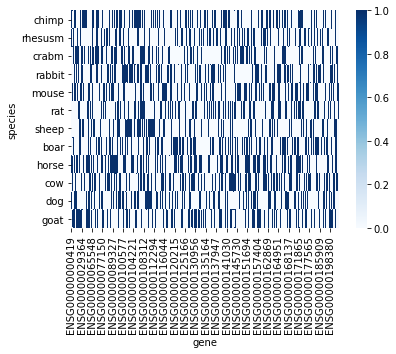

In [109]:
sns.heatmap(df_agg_ck_4.pivot('gene', "species", "auc")[['chimp', 'rhesusm', 'crabm', 'rabbit', 'mouse', 'rat', 'sheep', 'boar', 'horse', 'cow', 'dog', 'goat']].T.dropna(axis=1), cmap='Blues', vmin=0)



<AxesSubplot:xlabel='species', ylabel='gene'>

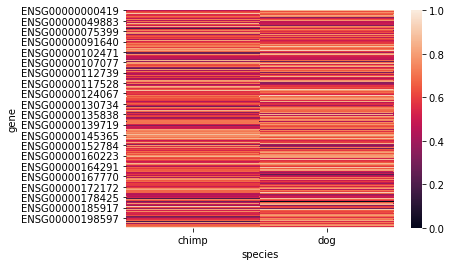

In [158]:
sns.heatmap(df_agg_ck_4.pivot('gene', "species", "auc")[['chimp', 'dog']].dropna(axis=0), vmin=0)




In [149]:
df_agg_ck_3.pivot( "species", 'gene',"auc").dropna(axis=1)

gene     ENSG00000000419  ENSG00000000457  ENSG00000001084  ENSG00000001167  \
species                                                                       
chimp           0.655833         0.546477         0.518769         0.715841   
dog             0.590833         0.463003         0.449700         0.853979   

gene     ENSG00000001461  ENSG00000001497  ENSG00000001561  ENSG00000001630  \
species                                                                       
chimp           0.652265         0.613636         0.594970         0.589971   
dog             0.538423         0.747475         0.495495         0.703540   

gene     ENSG00000002016  ENSG00000002330  ...  ENSG00000274211  \
species                                    ...                    
chimp           0.549392         0.751236  ...              0.5   
dog             0.544039         0.747865  ...              0.5   

gene     ENSG00000274523  ENSG00000275052  ENSG00000275342  ENSG00000275835  \
species                                                                       
chimp           0.814528         0.593654              0.5         0.678472   
dog             0.889012         0.544516              0.5         0.527083   

gene     ENSG00000276043  ENSG00000276234  ENSG00000277443  ENSG00000277481  \
species                                                                       
chimp            0.82488              0.5         0.510511         0.914389   
dog              0.47488              0.5         0.705706         0.521704   

gene     ENSG00000278318  
species                   
chimp           0.971770  
dog             0.985167  

[2 rows x 7271 columns]

In [150]:
df_agg_ck_3.pivot( "species", 'gene',"auc_h").dropna(axis=1)

gene     ENSG00000000419  ENSG00000000457  ENSG00000001084  ENSG00000001167  \
species                                                                       
chimp           0.651667         0.564262         0.537538          0.75976   
dog             0.655000         0.564430         0.537538          0.75976   

gene     ENSG00000001461  ENSG00000001497  ENSG00000001561  ENSG00000001630  \
species                                                                       
chimp           0.695134         0.200758         0.588589          0.70354   
dog             0.695302         0.198232         0.587838          0.70354   

gene     ENSG00000002016  ENSG00000002330  ...  ENSG00000274211  \
species                                    ...                    
chimp           0.562530         0.770112  ...              0.5   
dog             0.562044         0.770112  ...              0.5   

gene     ENSG00000274523  ENSG00000275052  ENSG00000275342  ENSG00000275835  \
species                                                                       
chimp           0.773599         0.552988              0.5         0.783333   
dog             0.772124         0.644948              0.5         0.783333   

gene     ENSG00000276043  ENSG00000276234  ENSG00000277443  ENSG00000277481  \
species                                                                       
chimp           0.633971              0.5         0.767643         0.687299   
dog             0.633971              0.5         0.663288         0.687299   

gene     ENSG00000278318  
species                   
chimp           0.975598  
dog             0.973206  

[2 rows x 7271 columns]

In [146]:
df_agg_ck_3.pivot( "species", 'gene', "auc")

KeyError: 'gene'

In [57]:
df_agg_ck_3.groupby(['gene'])['discrete'].sum().reset_index()['discrete']

0       1
1       0
2       1
3       0
4       0
       ..
5732    0
5733    1
5734    0
5735    1
5736    3
Name: discrete, Length: 5737, dtype: int64

In [127]:
df_agg_ck_3.groupby(['species'])['discrete'].sum().reset_index()['discrete']

0     777
1     747
2     854
3     845
4     722
5     750
6     823
7     930
8     611
9     863
10    925
11    876
Name: discrete, dtype: int64

In [125]:
df_agg_ck_3['gene'].nunique()

5737

<AxesSubplot:xlabel='discrete', ylabel='Count'>

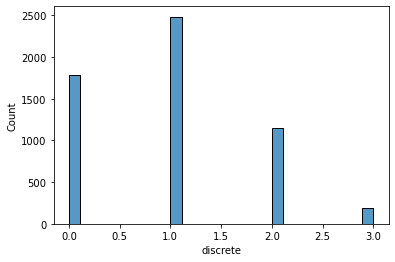

In [119]:
sns.histplot(df_agg_ck_3[df_agg_ck_3['species'].isin(['chimp', 'rhesusm', 'crabm'])].groupby(['gene'])['discrete'].sum().reset_index()['discrete'])

In [113]:
df_agg_ck_3

resol chr       auc     net_type             gene species     auc_h  \
0         10   X  0.667230  VC_rank_tss  ENSG00000000419    boar  0.592905   
1         10   X  0.495730  VC_rank_tss  ENSG00000000457    boar  0.642373   
2         10   X  0.551237  VC_rank_tss  ENSG00000000460    boar  0.695671   
3         10   X  0.369405  VC_rank_tss  ENSG00000000938    boar  0.674912   
4         10   X  0.749282  VC_rank_tss  ENSG00000001084    boar  0.502874   
...      ...  ..       ...          ...              ...     ...       ...   
61309     10   X  0.500000  VC_rank_tss  ENSG00000276234   sheep  0.500000   
61310     10   X  0.788124  VC_rank_tss  ENSG00000277443   sheep  0.883266   
61311     10   X  0.527778  VC_rank_tss  ENSG00000277586   sheep  0.411111   
61312     10   X  0.399038  VC_rank_tss  ENSG00000278195   sheep  0.538462   
61313     10   X  0.685649  VC_rank_tss  ENSG00000284308   sheep  0.791800   

       tss_tss  no_of_pairs  discrete  
0      1456588          NaN         0  
1      1456588          NaN         0  
2      1456588          NaN         1  
3      1456588          NaN         0  
4      1456588          NaN         1  
...        ...          ...       ...  
61309  1633384          NaN         0  
61310  1633384          NaN         0  
61311  1633384          NaN         1  
61312  1633384          NaN         0  
61313  1633384          NaN         0  

[61314 rows x 10 columns]

In [61]:
y = df_agg_ck_3.groupby(['gene'])['discrete'].sum().reset_index()

In [62]:
y[y['discrete'] == 12]

gene  discrete
1021  ENSG00000100941        12
3920  ENSG00000160214        12
4278  ENSG00000164916        12
5105  ENSG00000182095        12

<AxesSubplot:xlabel='species', ylabel='gene'>

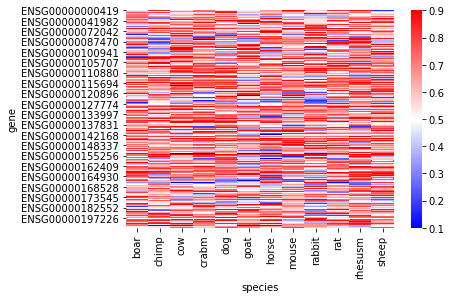

In [35]:
sns.heatmap(df_agg_ck_3.pivot('gene', "species", "auc").dropna(axis=0, thresh=10), cmap='bwr', vmin=0.1, vmax=0.9)

In [20]:
df_agg_ck_3[df_agg_ck_3['auc'] > 0.8].pivot("species", 'gene', "auc").dropna(axis=1, thresh=5)

gene     ENSG00000001167  ENSG00000004478  ENSG00000004700  ENSG00000004838  \
species                                                                       
boar            0.922414         0.848958              NaN         0.831091   
chimp                NaN              NaN              NaN              NaN   
cow                  NaN         0.856467              NaN              NaN   
crabm           0.924370              NaN              NaN         0.884028   
dog             0.829078              NaN              NaN         0.933011   
goat            0.827381         0.944257         0.834459         0.934896   
horse           0.961988              NaN         0.819950         0.906792   
mouse           0.876135              NaN              NaN         0.854551   
rabbit               NaN         0.853994         0.818182              NaN   
rat                  NaN              NaN         0.855140         0.811281   
rhesusm         0.815033              NaN         0.877206         0.884667   
sheep                NaN         0.817803              NaN         0.803862   

gene     ENSG00000004975  ENSG00000005483  ENSG00000005486  ENSG00000008300  \
species                                                                       
boar                 NaN              NaN         0.932432              NaN   
chimp                NaN         0.810231              NaN         0.952724   
cow             0.976690              NaN         0.811659              NaN   
crabm           0.804892              NaN         0.884444              NaN   
dog                  NaN         0.913743              NaN         0.929213   
goat                 NaN         0.802469         0.804012         0.950893   
horse           0.833942         0.886431         0.884956              NaN   
mouse           0.920049         0.870748              NaN         0.882256   
rabbit          0.807752              NaN              NaN              NaN   
rat                  NaN              NaN         0.919192         0.879526   
rhesusm              NaN         0.840164         0.939208              NaN   
sheep                NaN         0.828452         0.842399         0.948171   

gene     ENSG00000010322  ENSG00000011275  ...  ENSG00000214253  \
species                                    ...                    
boar            0.852337              NaN  ...              NaN   
chimp                NaN         0.920792  ...         0.818482   
cow             0.936782         0.820628  ...         0.972347   
crabm           0.975694              NaN  ...         0.841481   
dog             0.854282         0.856725  ...         0.839181   
goat            0.863095         0.905864  ...         0.837963   
horse           0.903902         0.889381  ...         0.976401   
mouse           0.835092              NaN  ...         0.978231   
rabbit          0.895755              NaN  ...              NaN   
rat             0.978412              NaN  ...         0.848485   
rhesusm         0.885667         0.892077  ...         0.896858   
sheep           0.901084         0.899582  ...         0.977685   

gene     ENSG00000214309  ENSG00000221890  ENSG00000221914  ENSG00000235173  \
species                                                                       
boar            0.847598         0.823232         0.924556         0.982249   
chimp           0.948020         0.952941              NaN         0.956376   
cow             0.988042              NaN              NaN              NaN   
crabm           0.936296              NaN         0.910405         0.962428   
dog                  NaN         0.881188         0.945588         0.932353   
goat                 NaN              NaN         0.947205              NaN   
horse           0.896755         0.959184         0.805901         0.869565   
mouse           0.925170         0.971429         0.821053         0.909211   
rabbit               NaN              NaN         0.93495